In [15]:
# batsman ko cluster karna hai jinka str. rate aur batting avg aas paas hai

In [16]:
ipl_2022_data = pd.read_csv('./ipl_2022_deliveries.csv')
ipl_2022_data

,match_id,season,match_no,date,venue,batting_team,bowling_team,innings,over,striker,bowler,runs_of_bat,extras,wide,legbyes,byes,noballs,wicket_type,player_dismissed,fielder
0,202201,2022,1,"Mar 26, 2022","Wankhede Stadium, Mumbai",CSK,KKR,1,0.1,Gaikwad,Umesh Yadav,0,1,0,0,0,1,NaN,NaN,NaN
1,202201,2022,1,"Mar 26, 2022","Wankhede Stadium, Mumbai",CSK,KKR,1,0.1,Gaikwad,Umesh Yadav,0,0,0,0,0,0,NaN,NaN,NaN
2,202201,2022,1,"Mar 26, 2022","Wankhede Stadium, Mumbai",CSK,KKR,1,0.2,Gaikwad,Umesh Yadav,0,1,1,0,0,0,NaN,NaN,NaN
3,202201,2022,1,"Mar 26, 2022","Wankhede Stadium, Mumbai",CSK,KKR,1,0.2,Gaikwad,Umesh Yadav,0,0,0,0,0,0,NaN,NaN,NaN
4,202201,2022,1,"Mar 26, 2022","Wankhede Stadium, Mumbai",CSK,KKR,1,0.3,Gaikwad,Umesh Yadav,0,0,0,0,0,0,caught,Gaikwad,Nitish Rana
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17907,202274,2022,74,"May 29, 2022","Narendra Modi Stadium, Ahmedabad",GT,RR,2,17.3,Miller,Ashwin,1,0,0,0,0,0,NaN,NaN,NaN
17908,202274,2022,74,"May 29, 2022","Narendra Modi Stadium, Ahmedabad",GT,RR,2,17.4,Shubman Gill,Ashwin,0,0,0,0,0,0,NaN,NaN,NaN
17909,202274,2022,74,"May 29, 2022","Narendra Modi Stadium, Ahmedabad",GT,RR,2,17.5,Shubman Gill,Ashwin,1,0,0,0,0,0,NaN,NaN,NaN
17910,202274,2022,74,"May 29, 2022","Narendra Modi Stadium, Ahmedabad",GT,RR,2,17.6,Miller,Ashwin,2,0,0,0,0,0,NaN,NaN,NaN


In [17]:
batsmen = ipl_2022_data['striker'].unique()
batsmen_data = {
    'batsman' : [],
    'strike_rate' : [],
    'batting_avg' : []
}
for batters in batsmen:
    batters_data = ipl_2022_data[ipl_2022_data['striker'] == batters]
    dismissed = len(batters_data[batters_data['player_dismissed'] == batters])
    if dismissed == 0:
        continue;
    batsmen_data['batsman'].append(batters)
    runs_scored = batters_data['runs_of_bat'].sum()
    batsmen_data['batting_avg'].append(runs_scored/dismissed)
    total_balls_played = len(batters_data.groupby(['match_id','over']))
    
    batsmen_data['strike_rate'].append((runs_scored/total_balls_played)*100)

import pandas as pd
batsmen_data = pd.DataFrame(batsmen_data)  
batsmen_data  

,batsman,strike_rate,batting_avg
0,Gaikwad,126.460481,26.285714
1,Uthappa,133.720930,20.909091
2,Conway,146.511628,42.000000
3,Rayudu,121.875000,27.300000
4,Jadeja,117.171717,19.333333
...,...,...,...
156,N Jagadeesan,108.108108,40.000000
157,Priyam Garg,139.393939,23.000000
158,Sanjay Yadav,0.000000,0.000000
159,Abhijeet Tomar,50.000000,4.000000


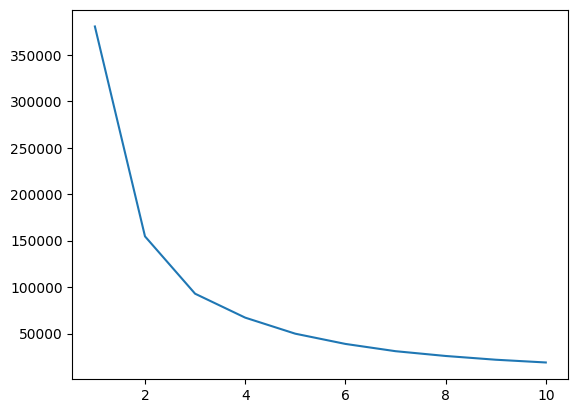

In [18]:
from sklearn.cluster import KMeans

wcss_batsmen_data = []
for i in range(1,11):
    cluster_batsmen_data = KMeans(n_init=10,n_clusters=i)
    cluster_batsmen_data.fit(batsmen_data[['strike_rate','batting_avg']])
    wcss_batsmen_data.append(cluster_batsmen_data.inertia_)
    
plt.plot(range(1,11),wcss_batsmen_data)

In [19]:
cluster_batsman_data_1 = KMeans(n_init=10,n_clusters=3)
cluster_batsman_data = cluster_batsman_data_1.fit_predict(batsmen_data[['strike_rate','batting_avg']])
cluster_batsman_data_1_centres = cluster_batsman_data_1.cluster_centers_

<Axes: >

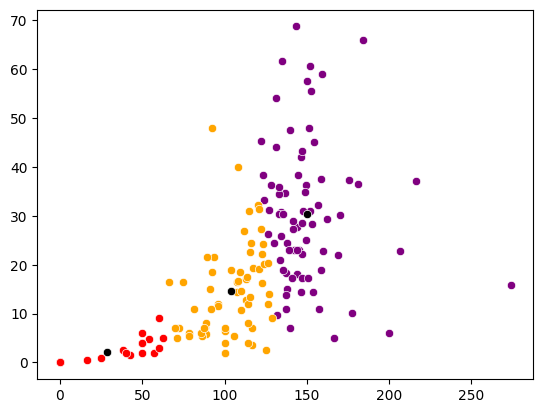

In [20]:
import numpy as np
batsmen_organised_data = np.array(batsmen_data[['strike_rate','batting_avg']])
sns.scatterplot(x=batsmen_organised_data[cluster_batsman_data == 0,0],y=batsmen_organised_data[cluster_batsman_data == 0,1] , c='purple')
sns.scatterplot(x=batsmen_organised_data[cluster_batsman_data == 1,0],y=batsmen_organised_data[cluster_batsman_data == 1,1] , c='red')
sns.scatterplot(x=batsmen_organised_data[cluster_batsman_data == 2,0],y=batsmen_organised_data[cluster_batsman_data == 2,1] , c='orange')
sns.scatterplot(x=cluster_batsman_data_1_centres[:,0],y=cluster_batsman_data_1_centres[:,1],c = 'black')

In [21]:
# cluster_batsman_data == 0

<Axes: xlabel='strike_rate', ylabel='batting_avg'>

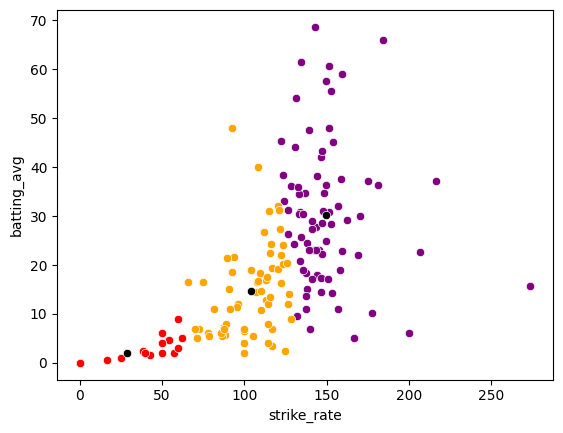

In [22]:
sns.scatterplot(x=batsmen_data[['strike_rate','batting_avg']].loc[cluster_batsman_data == 0,'strike_rate'],y=batsmen_data[['strike_rate','batting_avg']].loc[cluster_batsman_data == 0,'batting_avg'] , c='purple')
sns.scatterplot(x=batsmen_data[['strike_rate','batting_avg']].loc[cluster_batsman_data == 1,'strike_rate'],y=batsmen_data[['strike_rate','batting_avg']].loc[cluster_batsman_data == 1,'batting_avg'] , c='red')
sns.scatterplot(x=batsmen_data[['strike_rate','batting_avg']].loc[cluster_batsman_data == 2,'strike_rate'],y=batsmen_data[['strike_rate','batting_avg']].loc[cluster_batsman_data == 2,'batting_avg'] , c='orange')
sns.scatterplot(x=cluster_batsman_data_1_centres[:,0],y=cluster_batsman_data_1_centres[:,1],c = 'black')

## Inference :- ##
The above graph clusters attacking batsman in one group , defensive in other and other players in other group,hence batsmen with same strike rate and average are grouped
